In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [63]:

size_points = 10
media_point = np.array([0, 3])
radius_point = 2

# Generate random points uniformly distributed within a circle
# Use polar coordinates: random radius and random angle
random_r = np.sqrt(np.random.uniform(0, 1, size_points)) * radius_point
random_theta = np.random.uniform(0, 2 * np.pi, size_points)

# Convert to Cartesian coordinates and add center offset
random_x = media_point[0] + random_r * np.cos(random_theta)
random_y = media_point[1] + random_r * np.sin(random_theta)

# Combine into array of points
random_points = np.column_stack((random_x, random_y))

print(f"Generated {size_points} random points within circle")
print(f"Center: {media_point}, Radius: {radius_point}")


Generated 10 random points within circle
Center: [0 3], Radius: 2


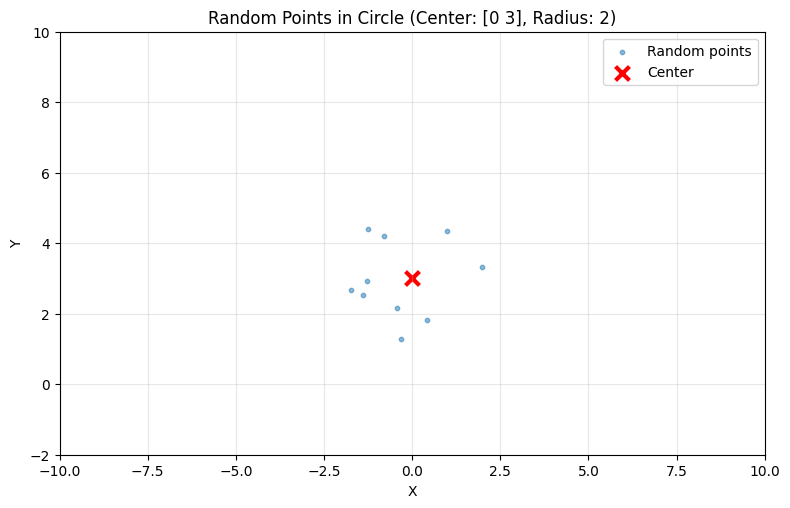

In [64]:
# Control axis limits
x_min, x_max = -10, 10
y_min, y_max = -2, 10

# Create figure and plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot random points
ax.scatter(random_points[:, 0], random_points[:, 1], alpha=0.5, s=10, label='Random points')

# Plot center point
ax.scatter(media_point[0], media_point[1], color='red', s=100, marker='x', linewidths=3, label='Center')

# # Draw circle boundary
# circle = plt.Circle((media_point[0], media_point[1]), radius_point, color='red', fill=False, linestyle='--', linewidth=2, label='Boundary')
# ax.add_patch(circle)

# Set axis limits
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Labels and formatting
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f'Random Points in Circle (Center: {media_point}, Radius: {radius_point})')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()


In [65]:
def generate_random_points_in_circle(media, size, radius):
    random_r = np.sqrt(np.random.uniform(0, 1, size)) * radius
    random_theta = np.random.uniform(0, 2 * np.pi, size)
    
    random_x = media[0] + random_r * np.cos(random_theta)
    random_y = media[1] + random_r * np.sin(random_theta)
    
    points = np.column_stack((random_x, random_y))
    
    return points

def plot_points_in_circle(points, media, radius, x_range=None, y_range=None, show_circle=False):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.scatter(points[:, 0], points[:, 1], alpha=0.5, s=10, label='Points')
    ax.scatter(media[0], media[1], color='red', s=100, marker='x', linewidths=3, label='Center')
    
    if show_circle:
        circle = plt.Circle((media[0], media[1]), radius, color='red', fill=False, linestyle='--', linewidth=2, label='Boundary')
        ax.add_patch(circle)
    
    if x_range is None:
        x_min, x_max = media[0] - radius - 1, media[0] + radius + 1
    else:
        x_min, x_max = x_range
    
    if y_range is None:
        y_min, y_max = media[1] - radius - 1, media[1] + radius + 1
    else:
        y_min, y_max = y_range
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Random Points in Circle (Center: {media}, Radius: {radius})')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

def generate_spline_path(start_point, spline_points, target_point, num_points=300):
    from scipy.interpolate import CubicSpline
    
    path_points = np.vstack([start_point, spline_points, target_point])
    
    t = np.arange(len(path_points))
    
    cs_x = CubicSpline(t, path_points[:, 0])
    cs_y = CubicSpline(t, path_points[:, 1])
    
    t_smooth = np.linspace(0, len(path_points) - 1, num_points)
    path_x = cs_x(t_smooth)
    path_y = cs_y(t_smooth)
    
    smooth_path = np.column_stack((path_x, path_y))
    
    return smooth_path, path_points

Generated 50 points
Center: [2 5], Radius: 4
Points shape: (50, 2)

First 5 points:
[[3.89479582 7.51647518]
 [0.81040206 2.01538745]
 [3.28031763 2.15862877]
 [0.98775742 1.85821882]
 [5.66467159 4.75348883]]


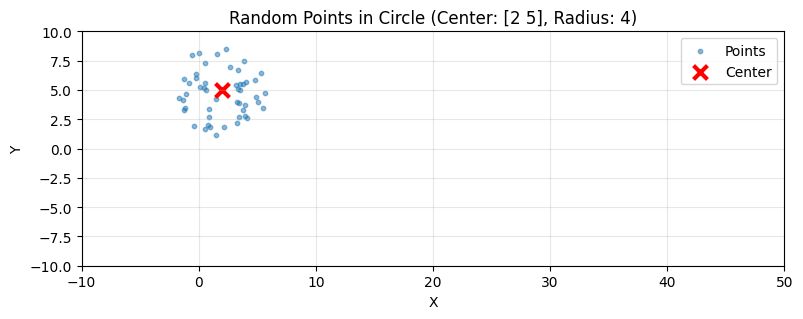

In [66]:
# Test the functions
test_media = np.array([2, 5])
test_size = 50
test_radius = 4

test_points = generate_random_points_in_circle(test_media, test_size, test_radius)

print(f"Generated {test_size} points")
print(f"Center: {test_media}, Radius: {test_radius}")
print(f"Points shape: {test_points.shape}")
print(f"\nFirst 5 points:\n{test_points[:5]}")

plot_points_in_circle(test_points, test_media, test_radius, x_range=(-10, 50), y_range=(-10, 10))


# Path generation

In [67]:
start_point = np.array([0, 10])
spline_points = np.array([[1, 2], [3, 4]])
target_point = np.array([10, 10])

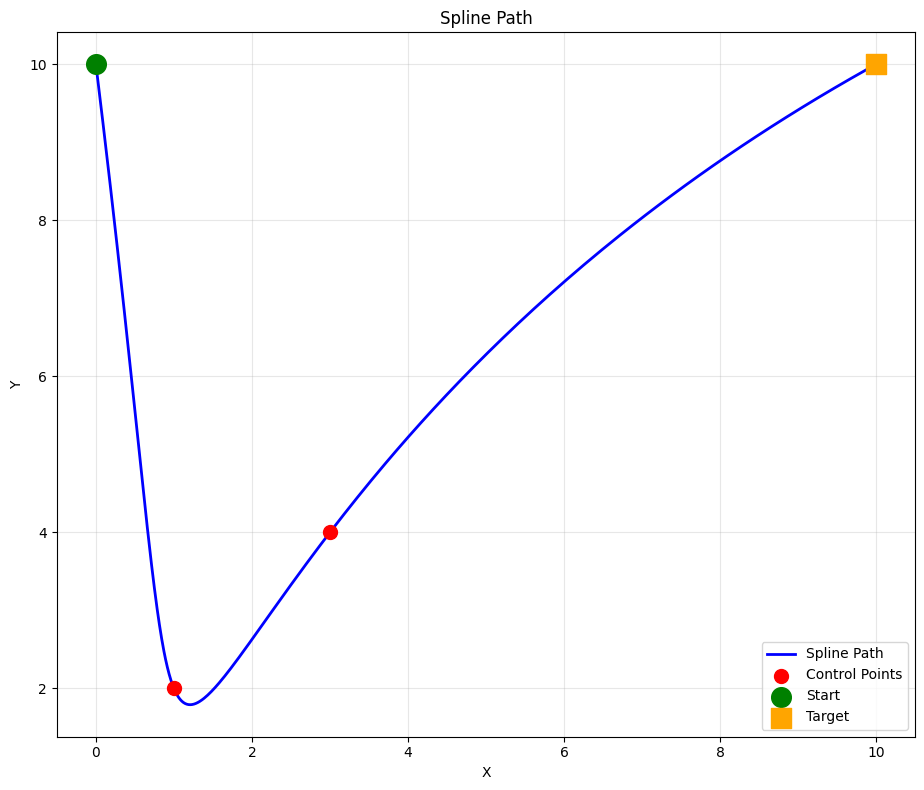

Path created with 4 control points
Smooth path generated with 300 points


In [68]:
# Combine all points for the path: start -> spline_points -> target
path_points = np.vstack([start_point, spline_points, target_point])

# Create parameter t for interpolation (distance along the path)
t = np.arange(len(path_points))

# Create cubic spline interpolation for x and y separately
cs_x = CubicSpline(t, path_points[:, 0])
cs_y = CubicSpline(t, path_points[:, 1])

# Generate smooth path with more points
t_smooth = np.linspace(0, len(path_points) - 1, 300)
path_x = cs_x(t_smooth)
path_y = cs_y(t_smooth)

# Plot the spline path
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the smooth spline path
ax.plot(path_x, path_y, 'b-', linewidth=2, label='Spline Path')

# Plot control points
ax.scatter(path_points[:, 0], path_points[:, 1], color='red', s=100, zorder=5, label='Control Points')

# Highlight start and target points
ax.scatter(start_point[0], start_point[1], color='green', s=200, marker='o', zorder=6, label='Start')
ax.scatter(target_point[0], target_point[1], color='orange', s=200, marker='s', zorder=6, label='Target')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Spline Path')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

print(f"Path created with {len(path_points)} control points")
print(f"Smooth path generated with {len(t_smooth)} points")


In [69]:
def generate_spline_path(start_point, spline_points, target_point, num_points=300):
    # Combine all points for the path: start -> spline_points -> target
    path_points = np.vstack([start_point, spline_points, target_point])
    
    # Create parameter t for interpolation (distance along the path)
    t = np.arange(len(path_points))
    
    # Create cubic spline interpolation for x and y separately
    cs_x = CubicSpline(t, path_points[:, 0])
    cs_y = CubicSpline(t, path_points[:, 1])
    
    # Generate smooth path with more points
    t_smooth = np.linspace(0, len(path_points) - 1, num_points)
    path_x = cs_x(t_smooth)
    path_y = cs_y(t_smooth)
    
    # Combine into array of path points
    smooth_path = np.column_stack((path_x, path_y))
    
    return smooth_path, path_points


Path created with 6 control points
Smooth path generated with 400 points


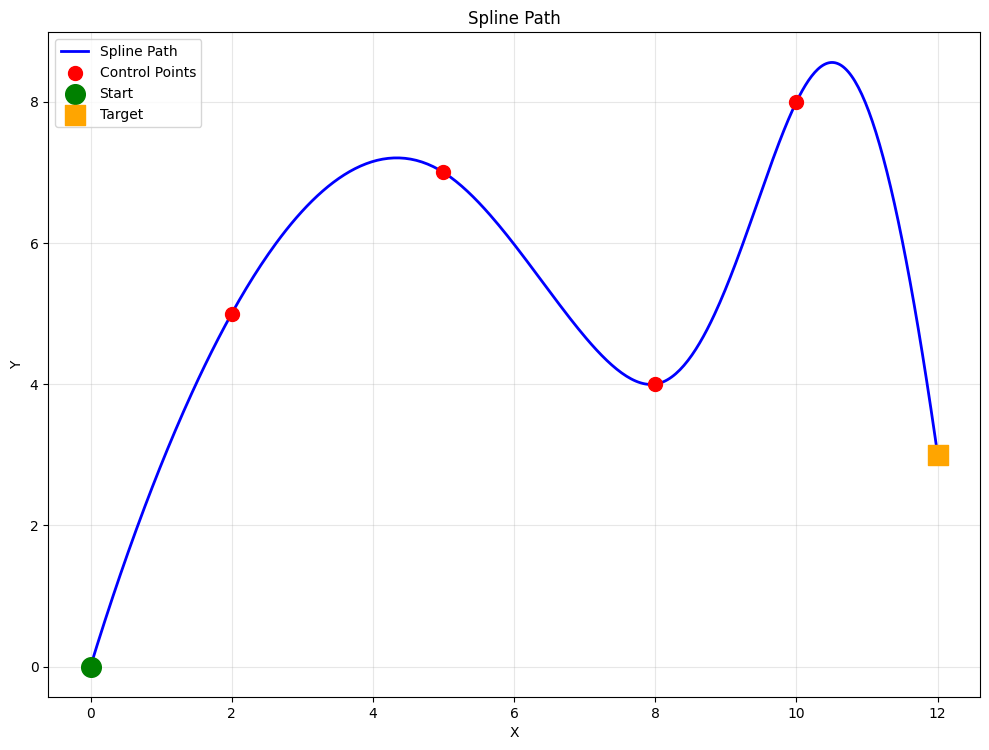

In [70]:
# Test the generate_spline_path function
test_start = np.array([0, 0])
test_spline = np.array([[2, 5], [5, 7], [8, 4], [10, 8]])
test_target = np.array([12, 3])

smooth_path, control_points = generate_spline_path(test_start, test_spline, test_target, num_points=400)

print(f"Path created with {len(control_points)} control points")
print(f"Smooth path generated with {len(smooth_path)} points")

plot_spline_path(smooth_path, control_points, test_start, test_target)


In [71]:
def plot_spline_path(smooth_path, control_points, start_point, target_point):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    ax.plot(smooth_path[:, 0], smooth_path[:, 1], 'b-', linewidth=2, label='Spline Path')
    ax.scatter(control_points[:, 0], control_points[:, 1], color='red', s=100, zorder=5, label='Control Points')
    ax.scatter(start_point[0], start_point[1], color='green', s=200, marker='o', zorder=6, label='Start')
    ax.scatter(target_point[0], target_point[1], color='orange', s=200, marker='s', zorder=6, label='Target')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Spline Path')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    plt.tight_layout()
    plt.show()


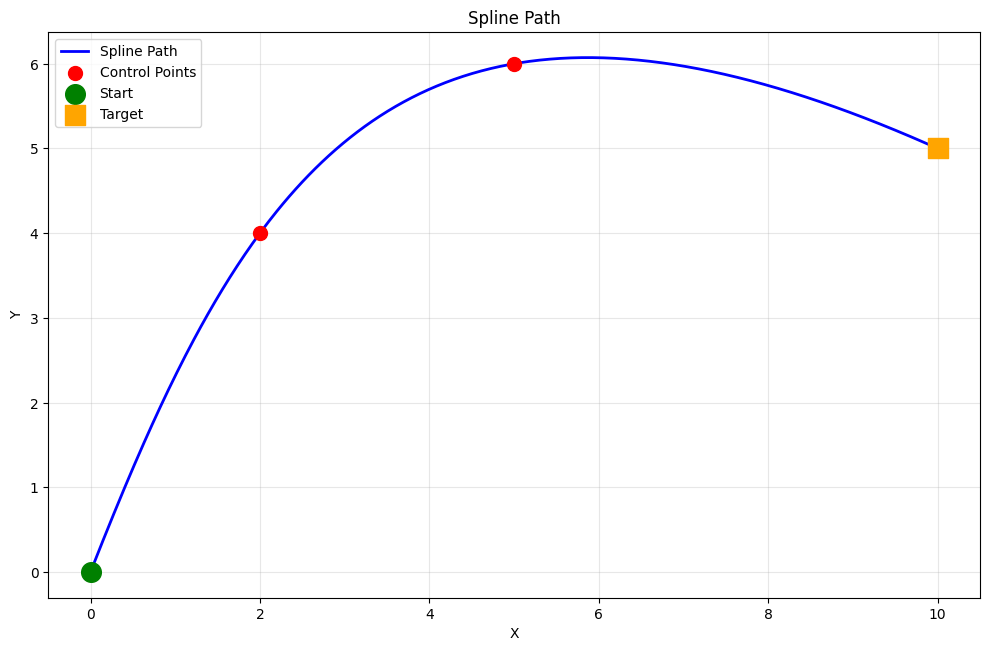

Generated smooth path with 300 points


In [72]:
# Test spline path generation
my_start = np.array([0, 0])
my_control_points = np.array([[2, 4], [5, 6]])
my_end = np.array([10, 5])

# Generate the spline path
my_smooth_path, my_control_pts = generate_spline_path(my_start, my_control_points, my_end)

# Plot the result
plot_spline_path(my_smooth_path, my_control_pts, my_start, my_end)

print(f"Generated smooth path with {len(my_smooth_path)} points")


# Random points + Paths

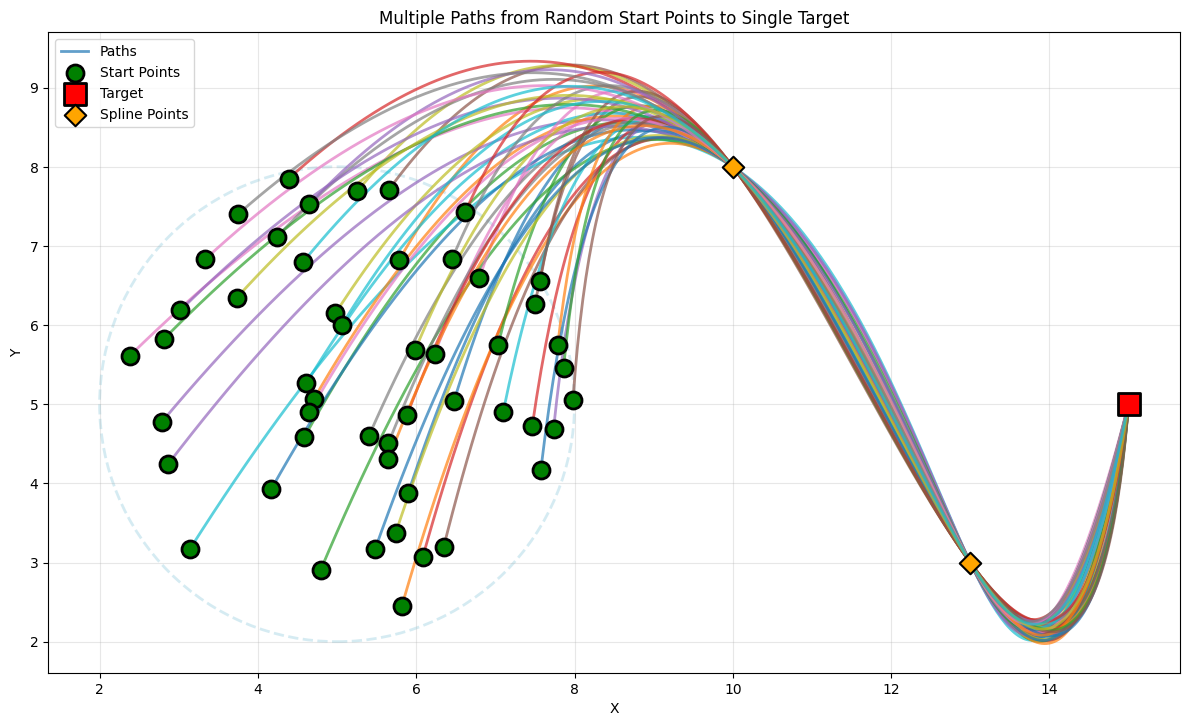

Generated 50 paths
Each path uses 2 spline control points


In [73]:
# Generate random start points
center = np.array([5, 5])
radius = 3
num_start_points = 50

start_points = generate_random_points_in_circle(center, num_start_points, radius)

# Define single target point
target_point = np.array([15, 5])

# Define two spline control points (same for all paths)
spline_control_points = np.array([[10, 8], [13, 3]])

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate and plot path for each start point
for i, start_pt in enumerate(start_points):
    smooth_path, control_pts = generate_spline_path(start_pt, spline_control_points, target_point, num_points=200)
    if i == 0:
        ax.plot(smooth_path[:, 0], smooth_path[:, 1], linewidth=2, alpha=0.7, label='Paths')
    else:
        ax.plot(smooth_path[:, 0], smooth_path[:, 1], linewidth=2, alpha=0.7)

# Plot start points
ax.scatter(start_points[:, 0], start_points[:, 1], color='green', s=150, zorder=5, edgecolors='black', linewidths=2, label='Start Points')

# Plot target point
ax.scatter(target_point[0], target_point[1], color='red', s=250, marker='s', zorder=6, edgecolors='black', linewidths=2, label='Target')

# Plot spline control points
ax.scatter(spline_control_points[:, 0], spline_control_points[:, 1], color='orange', s=120, marker='D', zorder=5, edgecolors='black', linewidths=1.5, label='Spline Points')

# Plot circle area
circle = plt.Circle((center[0], center[1]), radius, color='lightblue', fill=False, linestyle='--', linewidth=2, alpha=0.5)
ax.add_patch(circle)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f'Multiple Paths from Random Start Points to Single Target')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

print(f"Generated {num_start_points} paths")
print(f"Each path uses {len(spline_control_points)} spline control points")


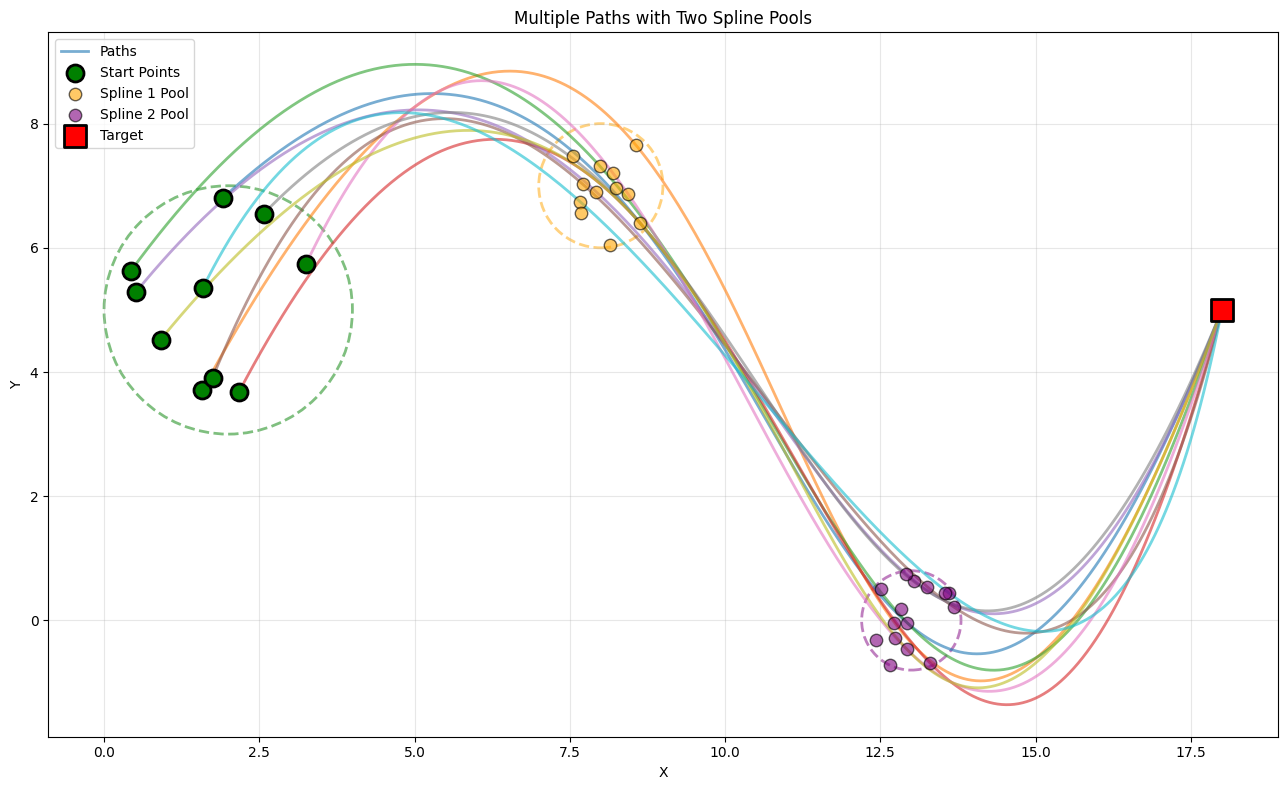

Generated 10 paths
Start points: 10 points
Spline 1 pool: 12 points
Spline 2 pool: 15 points
Each path randomly selects 1 point from Spline 1 pool, then 1 point from Spline 2 pool


In [76]:
# Generate random start points
start_center = np.array([2, 5])
start_radius = 2
num_start_points = 10

start_points = generate_random_points_in_circle(start_center, num_start_points, start_radius)

# Generate first spline pool
spline1_center = np.array([8, 7])
spline1_radius = 1
num_spline1_points = 12

spline1_pool = generate_random_points_in_circle(spline1_center, num_spline1_points, spline1_radius)

# Generate second spline pool
spline2_center = np.array([13, 0])
spline2_radius = 0.8
num_spline2_points = 15

spline2_pool = generate_random_points_in_circle(spline2_center, num_spline2_points, spline2_radius)

# Define single target point
target_point = np.array([18, 5])

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Generate and plot path for each start point
for i, start_pt in enumerate(start_points):
    # Randomly select one point from first spline pool
    spline1_idx = np.random.randint(0, num_spline1_points)
    spline1_point = spline1_pool[spline1_idx]
    
    # Randomly select one point from second spline pool
    spline2_idx = np.random.randint(0, num_spline2_points)
    spline2_point = spline2_pool[spline2_idx]
    
    # Combine the two spline points in order
    selected_splines = np.array([spline1_point, spline2_point])
    
    smooth_path, control_pts = generate_spline_path(start_pt, selected_splines, target_point, num_points=200)
    
    if i == 0:
        ax.plot(smooth_path[:, 0], smooth_path[:, 1], linewidth=2, alpha=0.6, label='Paths')
    else:
        ax.plot(smooth_path[:, 0], smooth_path[:, 1], linewidth=2, alpha=0.6)

# Plot start points area
circle_start = plt.Circle((start_center[0], start_center[1]), start_radius, color='green', fill=False, linestyle='--', linewidth=2, alpha=0.5)
ax.add_patch(circle_start)
ax.scatter(start_points[:, 0], start_points[:, 1], color='green', s=150, zorder=5, edgecolors='black', linewidths=2, label='Start Points')

# Plot first spline pool area
circle_spline1 = plt.Circle((spline1_center[0], spline1_center[1]), spline1_radius, color='orange', fill=False, linestyle='--', linewidth=2, alpha=0.5)
ax.add_patch(circle_spline1)
ax.scatter(spline1_pool[:, 0], spline1_pool[:, 1], color='orange', s=80, alpha=0.6, zorder=4, edgecolors='black', linewidths=1, label='Spline 1 Pool')

# Plot second spline pool area
circle_spline2 = plt.Circle((spline2_center[0], spline2_center[1]), spline2_radius, color='purple', fill=False, linestyle='--', linewidth=2, alpha=0.5)
ax.add_patch(circle_spline2)
ax.scatter(spline2_pool[:, 0], spline2_pool[:, 1], color='purple', s=80, alpha=0.6, zorder=4, edgecolors='black', linewidths=1, label='Spline 2 Pool')

# Plot target point
ax.scatter(target_point[0], target_point[1], color='red', s=250, marker='s', zorder=6, edgecolors='black', linewidths=2, label='Target')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Multiple Paths with Two Spline Pools')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

print(f"Generated {num_start_points} paths")
print(f"Start points: {num_start_points} points")
print(f"Spline 1 pool: {num_spline1_points} points")
print(f"Spline 2 pool: {num_spline2_points} points")
print(f"Each path randomly selects 1 point from Spline 1 pool, then 1 point from Spline 2 pool")
